In [1]:
%run functions_wiki.py
%run ~/GoogleDrive/research/wikipedia_shared/code/Christian/quality_helpers.py

In [4]:
from glob import glob
from scipy.stats import entropy
import powerlaw

In [12]:
def select_windows(revision_group, window_no):
    return pd.concat([c[1] for c in list(revision_group)[window_no:window_no+4]])

def Jaccard(x,y):
    return len(set(x)&set(y))/len(set(x)|set(y))

def parse_revision_window(data,article_name,quality):
    history = {}
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.sort_values('timestamp', ascending=False)
    g = data.groupby(pd.Grouper(key='timestamp', freq='Q'))
    print('This page existed for %s years' %(len(g)/4))
    if len(g)>=5:  # only analyze article life longer than 1.25 years
        for i in range(len(g)-4):
            default = {'alpha': 'NA', 'fitness_R':'NA', 'fitness_p':'NA', 'fit':'NA', 'editor_concentration':'NA',
                      'burstiness':'NA', 'submission':'NA', 'persistent_contribs':'NA','top_contributors':'NA',
                      'entropy':'NA'}
            tmp = select_windows(g, i)  # get revision 
            intervals = get_time_intervals(tmp)
            if len(intervals)>10:  # 10 as the min intervals count
                fit = powerlaw.Fit(intervals, xmin=100)
                default['alpha'] = fit.power_law.alpha
                default['fitness_R'], default['fitness_p'] = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
                if default['fitness_R'] > 0:
                    default['fit'] = 'power_law'
                else:
                    default['fit'] = 'exponential'
                users = tmp['user'].value_counts()
                default['entropy'] = entropy(users)
                default['top_contributors'] = users.index[:3].values
                default['editor_concentration'] = gini(users.values.astype(float))
                default['burstiness'] = cal_burstiness(intervals)
                default['submission'] = len(tmp)
                text1, text2 = tmp['text'].values[0], tmp['text'].values[-1]
                default['persistent_contribs'] = getPersistentContribs(text1, text2)
            history[i] = default
    else:
        print("too short artile life")
    history = pd.DataFrame(history).T
    history['article_name'] = article_name
    history['quality'] = quality
    return history

In [5]:
file_dir = '../../data/*'
files = glob(file_dir)

In [7]:
def parse_title(x):
    a = x.split("/")[-1].replace(".txt","").split("_")
    title, quality = " ".join(a[:-1]), int(a[-1])
    return title, quality

In [14]:
pannel = []
for f in files:
    data = pd.read_csv(f, sep="\t")
    title, quality = parse_title(f)
    try:
        pannel.append(parse_revision_window(data, title, quality))
    except:
        print('page %s parse error' %title)
pannel2 = pd.concat(pannel)

This page existed for 14.5 years
This page existed for 13.25 years


  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))



This page existed for 10.75 years
This page existed for 10.0 years


  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))



This page existed for 5.25 years
This page existed for 12.0 years
This page existed for 16.25 years
This page existed for 11.25 years
This page existed for 15.25 years
This page existed for 14.5 years
This page existed for 11.75 years
This page existed for 14.5 years
This page existed for 16.5 years
This page existed for 12.5 years
This page existed for 13.0 years


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


This page existed for 14.0 years
This page existed for 12.5 years
This page existed for 13.5 years
This page existed for 12.5 years
This page existed for 10.0 years
This page existed for 16.0 years
This page existed for 15.75 years
This page existed for 10.25 years
This page existed for 7.5 years
This page existed for 14.5 years
This page existed for 14.25 years
This page existed for 16.5 years
This page existed for 7.75 years
This page existed for 12.0 years
This page existed for 13.5 years
This page existed for 10.5 years
This page existed for 16.0 years
This page existed for 12.5 years
This page existed for 13.5 years
This page existed for 16.25 years
This page existed for 15.5 years
This page existed for 13.25 years
This page existed for 16.75 years
This page existed for 14.0 years
This page existed for 12.5 years
This page existed for 7.25 years
This page existed for 14.25 years
This page existed for 10.25 years
This page existed for 14.75 years
This page existed for 9.75 years
Th

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


This page existed for 14.75 years
This page existed for 15.75 years
This page existed for 13.75 years
This page existed for 12.0 years
This page existed for 6.75 years
This page existed for 14.25 years
This page existed for 7.25 years


In [288]:
def compare_dist(fit):
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    if R>0:
        return 'powerlaw',p
    else:
        return 'exponential',p
    
total = {}
for f in files:
    default = {'alpha':0, 'dist':'NA', 'P':0, 'quality':'NA','burstiness':0}
    data = pd.read_csv(f, sep="\t")
    title, quality = parse_title(f)
    intervals = get_time_intervals(data)
    fit = powerlaw.Fit(intervals, xmin=100)
    default['alpha'] = fit.power_law.alpha
    default['dist'],default['P'] = compare_dist(fit)
    default['quality'] = quality
    default['burstiness'] = cal_burstiness(intervals)
    total[title] = default

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))

  (Theoretical_CDF * (1 - Theoretical_CDF))

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [289]:
total = pd.DataFrame(total).T
total.head()

,P,alpha,burstiness,dist,quality
AICCU,0.0665867,1.10694,0.231594,exponential,1
Adobe Systems,0.0506646,1.16757,0.425645,powerlaw,3
AirPlay,0.446532,1.14596,0.349207,exponential,1
Alone in the Dark,5.42276e-09,1.15892,0.384828,powerlaw,1
American McGee's Alice,3.91983e-07,1.16622,0.41087,powerlaw,2


In [316]:
a = total[total['dist']=='powerlaw'][['alpha','quality','burstiness']]
a

,alpha,quality,burstiness
Adobe Systems,1.16757,3,0.425645
Alone in the Dark,1.15892,1,0.384828
American McGee's Alice,1.16622,2,0.41087
Angry Birds Rio,1.16126,1,0.373587
Apple Daisy Wheel Printer,1.10399,1,0.0482328
Apple IIc Plus,1.14733,2,0.301747
AppleCare,1.14326,1,0.309782
AppleWorks,1.14325,1,0.266072
Beagle Bros,1.13396,1,0.253784
Black & White (video game),1.19631,4,0.468379


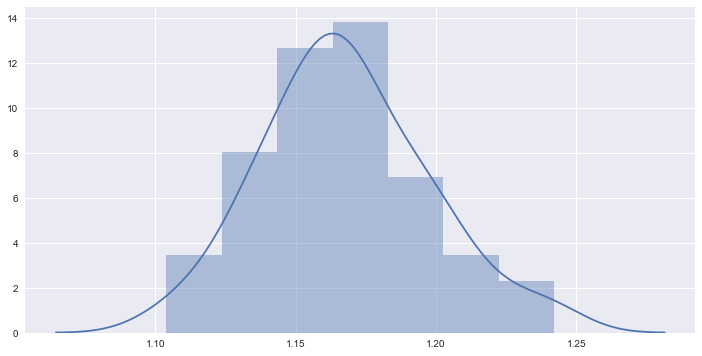

In [310]:
sns.distplot(np.float_(total[total['dist']=='powerlaw']['alpha'].values))
plt.show()

In [286]:
data = pd.read_csv("../../data/MacBook_Pro_4.txt", sep="\t")
intervals = get_time_intervals(data)

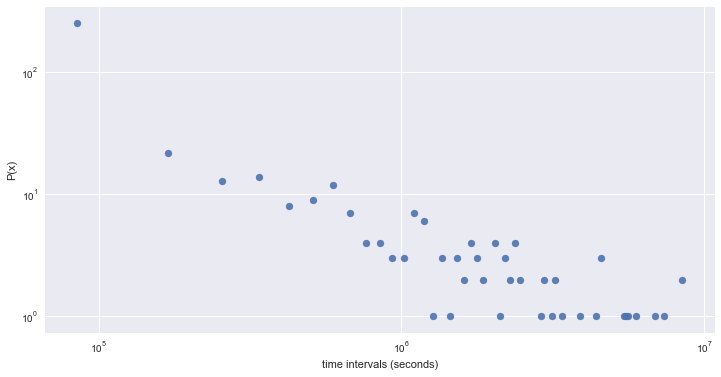

In [311]:
hist, bins = np.histogram(intervals,100)
plt.yscale('log')
plt.xscale('log')
plt.scatter(bins[1:],hist,alpha=0.9)
plt.xlabel('time intervals (seconds)')
plt.ylabel('P(x)')
plt.show()

In [17]:
pannel2['session_id'] = pannel2.index
pannel2['fit2'] = pannel2['fit'].map({'power_law':1, 'exponential':0})
pannel2.reset_index(drop=True, inplace=True)

In [95]:
pannel2.to_csv("../../pannel_backup.csv")

In [107]:
pannel2 = pd.read_csv("../../pannel_backup.csv", na_values='NA',index_col=0)

In [162]:
pannel2.groupby('article_name').size().mean()

46.811320754716981

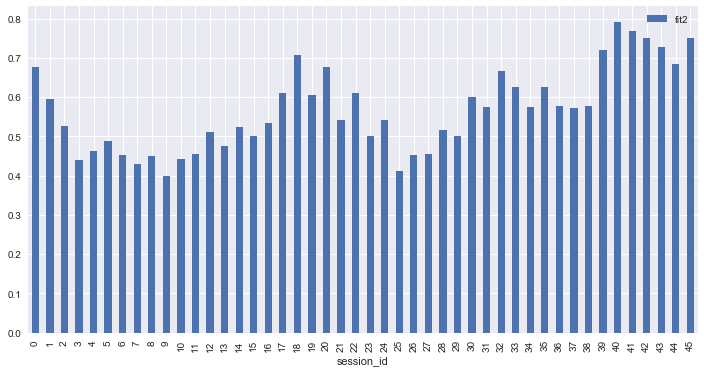

In [168]:
pannel2.groupby('session_id').agg({'fit2':np.mean})[:46].plot.bar()
plt.show()

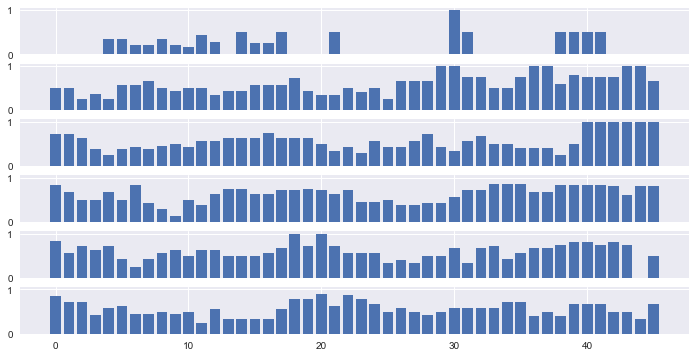

In [169]:
## compare different quality page fit
fit = pannel2.groupby(['quality','session_id']).agg({'fit2':np.mean})

fig, axes = plt.subplots(6, 1, sharex=True, sharey=True)
for a,ax in enumerate(axes):
    tmp = fit.ix[a]
    ax.bar(tmp.index.values[:46], tmp['fit2'].values[:46])
plt.show()

In [117]:
pannel2.head()

,alpha,burstiness,editor_concentration,entropy,fit,fitness_R,fitness_p,persistent_contribs,submission,top_contributors,article_name,quality,session_id,fit2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MacPaint,4,0,NaN
1,1.225406,0.379071,0.461538,0.687092,power_law,2.998564,0.002713,245.0,13.0,['GRAHAMUK' 'Ellmist' '68.6.116.197'],MacPaint,4,1,1.0
2,1.183423,0.279970,0.506667,1.080574,power_law,2.239968,0.025093,251.0,15.0,['GRAHAMUK' 'Ellmist' '68.6.116.197'],MacPaint,4,2,1.0
3,1.155719,0.151640,0.492063,1.428056,power_law,1.472174,0.140974,256.0,18.0,['GRAHAMUK' 'Ellmist' 'Wapcaplet'],MacPaint,4,3,1.0
4,1.141173,0.128087,0.466667,1.679648,power_law,0.810315,0.417759,285.0,20.0,['GRAHAMUK' 'Maury Markowitz' '68.6.116.197'],MacPaint,4,4,1.0


In [171]:
mask = pannel2['article_name'] == 'ITunes Store'
sub = pannel2[mask].set_index('session_id')

In [172]:
len(sub)

55

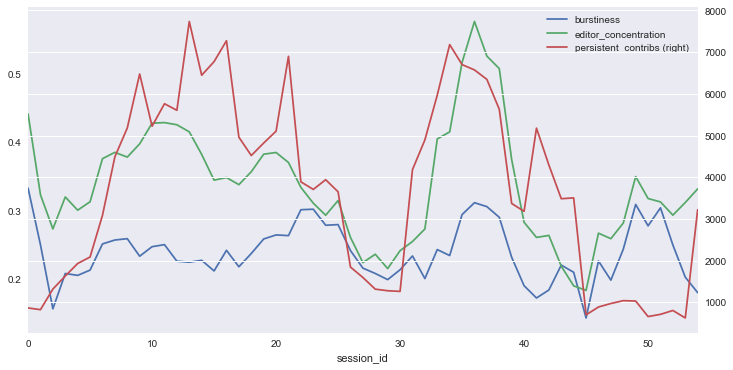

In [276]:
sub[['burstiness','editor_concentration','persistent_contribs']].plot(secondary_y=['persistent_contribs'])
plt.show()

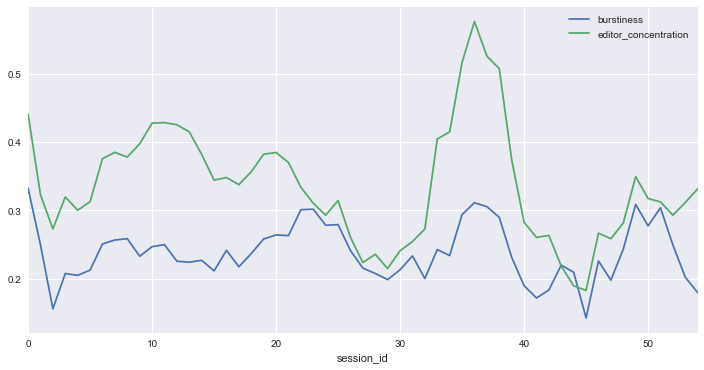

In [174]:
sub[['burstiness','editor_concentration']].plot()
plt.show()

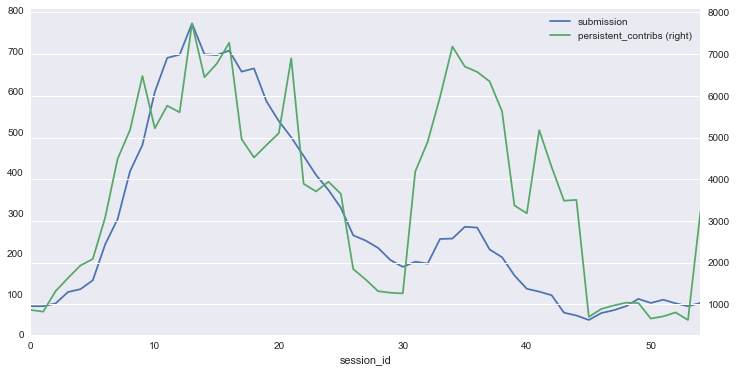

In [175]:
sub[['submission','persistent_contribs']].plot(secondary_y=['persistent_contribs'])
plt.show()

In [318]:
pannel2[['burstiness','editor_concentration','entropy','submission','persistent_contribs','fit2','alpha']].corr()

,burstiness,editor_concentration,entropy,submission,persistent_contribs,fit2,alpha
burstiness,1.000000,0.765378,0.060833,0.338360,0.387446,0.581129,0.792784
editor_concentration,0.765378,1.000000,-0.062688,0.369320,0.505121,0.565549,0.800686
entropy,0.060833,-0.062688,1.000000,0.651253,0.379359,-0.006253,0.225231
submission,0.338360,0.369320,0.651253,1.000000,0.643376,0.210796,0.597604
persistent_contribs,0.387446,0.505121,0.379359,0.643376,1.000000,0.243193,0.584226
fit2,0.581129,0.565549,-0.006253,0.210796,0.243193,1.000000,0.526578
alpha,0.792784,0.800686,0.225231,0.597604,0.584226,0.526578,1.000000


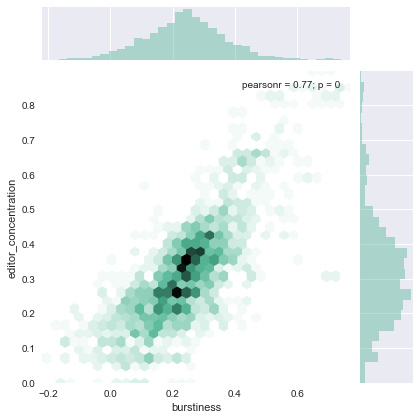

In [195]:
sns.jointplot(pannel2['burstiness'], pannel2['editor_concentration'], kind="hex",color="#4CB391")
plt.show()

In [228]:
def take_bins(x, bins=5):
    bins = np.linspace(x.min(), x.max(), bins)
    name = [">=" + str(c) for c in np.round(bins,2)]
    print("bins are listed:")
    print("====================")
    print(",  ".join(name))
    return np.digitize(x, bins), name

In [267]:
pannel2['b2'], bins_b2 = take_bins(pannel2['burstiness'])
pannel2['e2'], bins_e2 = take_bins(pannel2['editor_concentration'],bins=9)
pannel2['entropy2'], bins_entropy2 = take_bins(pannel2['entropy'])

bins are listed:
>=-0.22,  >=0.03,  >=0.27,  >=0.52,  >=0.77
bins are listed:
>=-0.0,  >=0.11,  >=0.22,  >=0.34,  >=0.45,  >=0.56,  >=0.67,  >=0.79,  >=0.9
bins are listed:
>=0.41,  >=1.9,  >=3.38,  >=4.86,  >=6.34


In [270]:
bins_e2 = [c for c in bins_e2[::-1]]

In [271]:
ave_pc = pannel2.pivot_table(index='e2', columns='b2', values='persistent_contribs', aggfunc=np.mean)
ave_pc = ave_pc.sort_index(ascending=False)
ave_pc.columns, ave_pc.index = bins_b2, bins_e2
ave_pc

,>=-0.22,>=0.03,>=0.27,>=0.52,>=0.77
>=0.9,NaN,NaN,NaN,7582.000000,NaN
>=0.79,NaN,NaN,9674.666667,4621.720000,3690.0
>=0.67,NaN,NaN,5828.090909,3899.000000,NaN
>=0.56,NaN,2003.000000,4097.934211,2153.083333,NaN
>=0.45,NaN,1175.400000,2580.425926,2424.857143,NaN
>=0.34,103.000000,2074.169082,2196.746154,380.250000,NaN
>=0.22,155.700000,1065.500000,1087.095238,110.500000,NaN
>=0.11,278.311475,446.227723,533.950000,NaN,NaN
>=-0.0,295.114286,233.853333,NaN,NaN,NaN


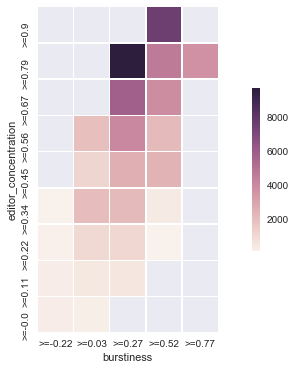

In [275]:
sns.heatmap(ave_pc, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xlabel('burstiness')
plt.ylabel('editor_concentration')
plt.show()

In [233]:
ave_pc = pannel2.pivot_table(index='b2', columns='entropy2', values='persistent_contribs', aggfunc=np.mean)
ave_pc.columns, ave_pc.index = bins_e2, bins_b2
ave_pc

,>=0.41,>=2.39,>=4.37,>=6.34
>=-0.22,219.058140,349.703883,1736.000000,NaN
>=0.11,596.654378,1219.854358,3454.989474,5310.0
>=0.44,3183.780822,2605.300000,3877.666667,NaN
>=0.77,3690.000000,NaN,NaN,NaN


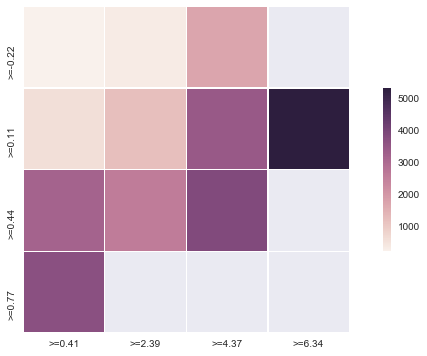

In [234]:
sns.heatmap(ave_pc, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

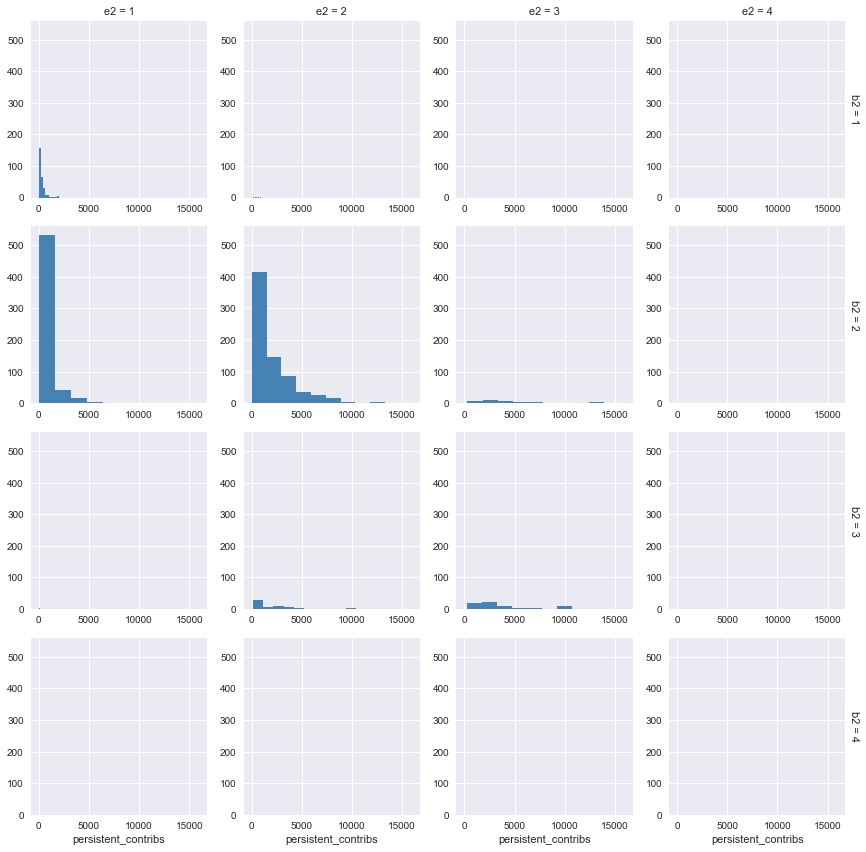

In [223]:
g = sns.FacetGrid(pannel2, row="b2", col="e2", margin_titles=True)
g.map(plt.hist, "persistent_contribs", color="steelblue", lw=0)
plt.show()

In [198]:
pannel2.pivot_table(index='fit', values='burstiness',aggfunc=[np.mean,np.min,np.max])

,mean,amin,amax
fit,,,
exponential,0.149030,-0.218867,0.444926
power_law,0.315255,0.010566,0.767688
